In [1]:
import os, shutil

original_dir = '/Users/phoelapyae/Downloads/dogs-vs-cats/train'

base_dir = '/Users/phoelapyae/Documents/All/ML/Learn/dive-into-deep/data/cats_and_dogs_small'
os.mkdir(base_dir)

In [2]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

In [3]:
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

In [4]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_dogs_dir)
os.mkdir(test_cats_dir)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [11]:
print(len(os.listdir(train_cats_dir)))

1000


In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [15]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
for data_batch, label_batch in train_generator:
    print(data_batch.shape)
    print(label_batch.shape)
    break

(20, 150, 150, 3)
(20,)


In [17]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 77s 755ms/step - loss: 0.6999 - acc: 0.4980 - val_loss: 0.6850 - val_acc: 0.5400
Epoch 2/30
100/100 [==============================] - 83s 832ms/step - loss: 0.6733 - acc: 0.5917 - val_loss: 0.6434 - val_acc: 0.6360
Epoch 3/30
100/100 [==============================] - 83s 828ms/step - loss: 0.6339 - acc: 0.6579 - val_loss: 0.6465 - val_acc: 0.6130
Epoch 4/30
100/100 [==============================] - 93s 932ms/step - loss: 0.5726 - acc: 0.6983 - val_loss: 0.5985 - val_acc: 0.6860
Epoch 5/30
100/100 [==============================] - 87s 866ms/step - loss: 0.5388 - acc: 0.7147 - val_loss: 0.5896 - val_acc: 0.6760
Epoch 6/30
100/100 [==============================] - 82s 819ms/step - loss: 0.5228 - acc: 0.7442 - val_loss: 0.6046 - val_acc: 0.6660
Epoch 7/30
100/100 [==============================] - 573s 6s/step - loss: 0.4844 - acc: 0.7751 - val_loss: 0.5965 - val_acc: 0.6800
Epoch 8/30
100/100 [==============================] - 76s

In [18]:
model.save('cats_and_dogs_small_1.h5')

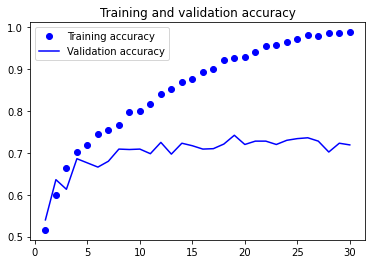

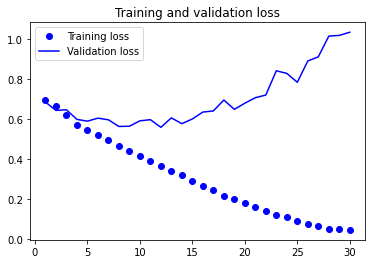

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
datagen = ImageDataGenerator(rotation_range=60, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

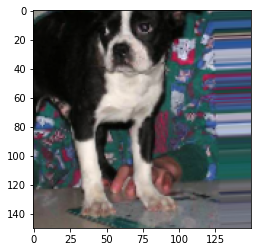

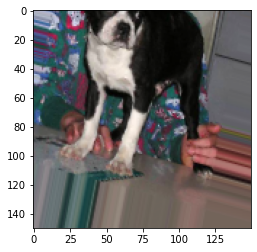

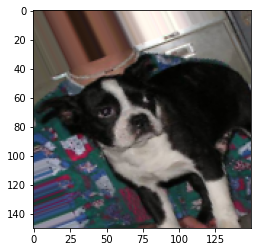

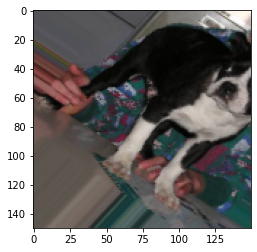

In [22]:
from keras.preprocessing import image

fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
image_path = fnames[3]

img = image.load_img(image_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
    plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [28]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['acc'])

In [29]:
print(dir(ImageDataGenerator))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_keras_api_names', '_keras_api_names_v1', 'apply_transform', 'fit', 'flow', 'flow_from_dataframe', 'flow_from_directory', 'get_random_transform', 'random_transform', 'standardize']


In [35]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 99s 989ms/step - loss: 0.6643 - acc: 0.6030 - val_loss: 0.6351 - val_acc: 0.6410
Epoch 2/100
100/100 [==============================] - 104s 1s/step - loss: 0.6595 - acc: 0.6130 - val_loss: 0.6216 - val_acc: 0.6500
Epoch 3/100
100/100 [==============================] - 97s 964ms/step - loss: 0.6476 - acc: 0.6245 - val_loss: 0.6166 - val_acc: 0.6580
Epoch 4/100
100/100 [==============================] - 90s 898ms/step - loss: 0.6312 - acc: 0.6440 - val_loss: 0.6006 - val_acc: 0.6670
Epoch 5/100
100/100 [==============================] - 110s 1s/step - loss: 0.6214 - acc: 0.6545 - val_loss: 0.6150 - val_acc: 0.6400
Epoch 6/100
100/100 [==============================] - 154s 2s/step - loss: 0.6234 - acc: 0.6535 - val_loss: 0.5756 - val_acc: 0.7030
Epoch 7/100
100/100 [==============================] - 173s 2s/step - loss: 0.5991 - acc: 0.6720 - val_loss: 0.5694 - val_acc: 0.7020
Epoch 8/100
100/100 [==============================] - 1

In [39]:
model.save('cats_and_dogs_small_2.h5')

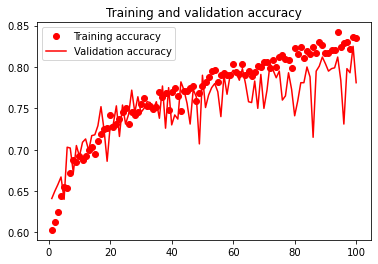

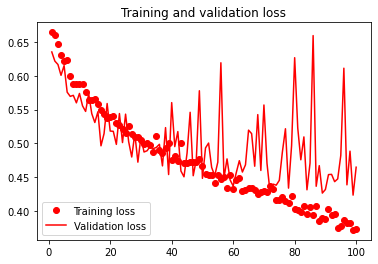

In [40]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch = range(1, len(acc) + 1)

plt.clf()

plt.plot(epoch, acc, 'ro', label='Training accuracy')
plt.plot(epoch,  val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epoch, loss, 'ro', label='Training loss')
plt.plot(epoch,  val_loss, 'r', label='Validation loss')
plt.legend()
plt.title('Training and validation loss')
plt.show()
